In [15]:
import pandas as pd
import datetime as datetime
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt

from db_utils import DataFrameInfo, DataTransform, Plotter, DataFrameTransform, Query, QueryVisualiser

In [16]:
dataframe = pd.read_csv('normalized_data.csv')
query = Query(dataframe)

The following cells portray the data analysis based on SQL queries of the cleaned database

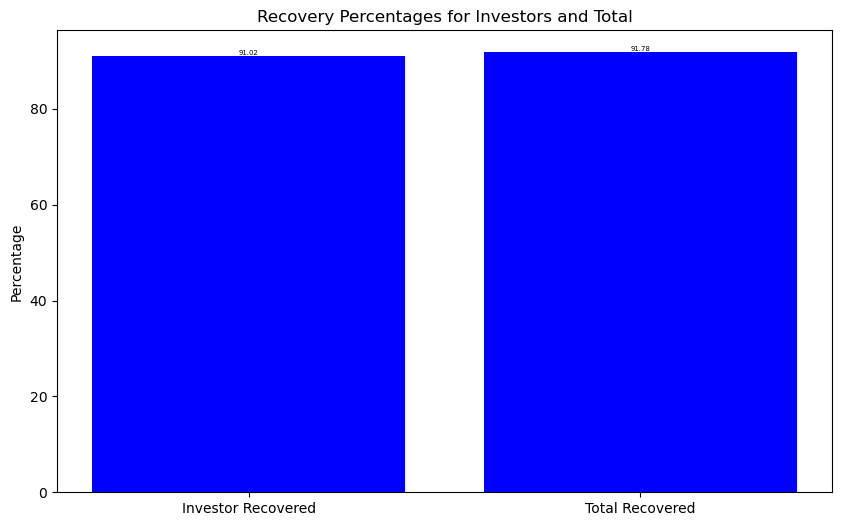

In [17]:
#Visualising the percentage of recoveries based on investor funding and total funding. 
perc_rec, perc_rec_inv = query.percentage_recovered()
queryvisual = QueryVisualiser(dataframe)
queryvisual.percentage_visuals(perc_rec, perc_rec_inv)

What percentage of loans have been a loss to the company?

In [18]:
query.percentages_loss()

10.272722243735133

What percentage of loans have been charged off historically?

In [19]:
query.percentage_loss_year()

For loans issued in 2021, the percentage of losses is: 3.31%
For loans issued in 2019, the percentage of losses is: 9.36%
For loans issued in 2017, the percentage of losses is: 14.44%
For loans issued in 2016, the percentage of losses is: 12.04%
For loans issued in 2015, the percentage of losses is: 11.20%
For loans issued in 2014, the percentage of losses is: 9.72%
For loans issued in 2013, the percentage of losses is: 9.62%


What was the total amount paid towards these loans before they were charged off?

In [20]:
query.amount_paid_before_loss()

The total amount paid back was 37400589.04 out of 76359400 total borrowed for these accounts.


What is the projected loss of the loans marked as charged off?
This is based on the revenue (based on interest) + the total borrowed which was not paid back in the case of charged off accounts. 

In [21]:
query.projected_loss()

The projected loss on the loans marked as CHARGED OFF for next year is £43854721.54


Had the loans finished their term, what is the loss in revenue for the loans which were charged off?

In [22]:
query.revenue_loss()

 The loss of revenue the loans marked as CHARGED OFF would have generated would have been £96180390.56


How does the loss of revenue month-on-month look visually? 

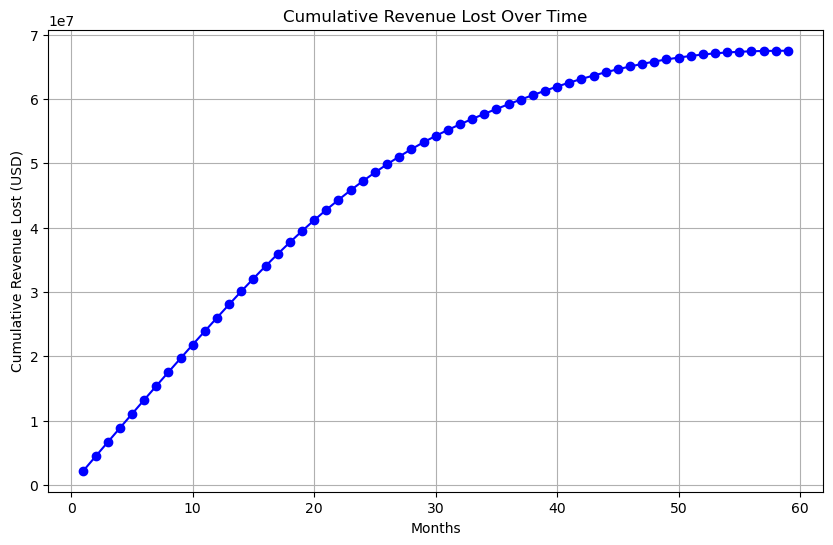

In [23]:
monthly_revenue_lost = query.cumulative_revenue_loss()
queryvisual.cumulative_revenue_loss(monthly_revenue_lost)

What percentage of users present a risk to the company revenue? (Risk = people behind on loan payments)

In [24]:
query.percentage_late()

The percentage of current risk users from all the loans is 1.26%


How many customers are in this bracket and how much loss would the comapny incur if their status was changed to CHARGED OFF?

In [25]:
query.total_risk_and_potential_loss()

The amount of people in the Risk bracket is 686
The immediate loss if the Risk customers were charged off would be £3283100.05
 The potential loss if the customers in this bracket were charged off is £12518265.43


If Risk customers converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loans represent? 

In [26]:
percentages_revenue_lost = query.percentage_total_revenue_lost()

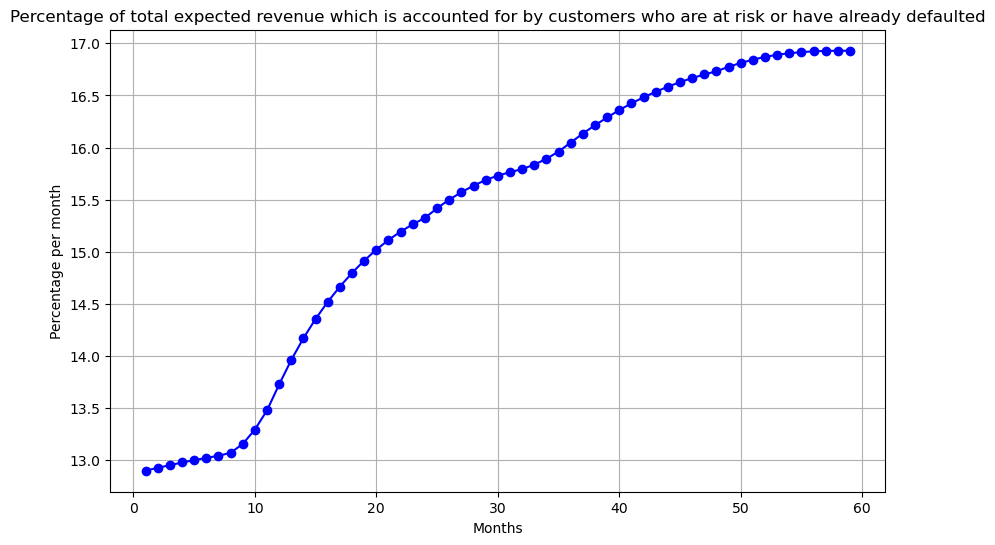

In [27]:
queryvisual.cumulative_potential_revenue_loss(percentages_revenue_lost)

In order to do an analysis on what the indicators of loss may be, we must first save a subset dataframe of the Charged-off customers

In [35]:
query.indicator_of_loss_analysis("charged_off_dataframe.csv")

A file with the name /Users/nataszasiwinska/Documents/coding_projects/aicore/Customer-Loans-Project/charged_off_dataframe.csv already exists. DataFrame not saved.


In [36]:
charged_off_df = pd.read_csv('charged_off_dataframe.csv')
charged_off_df.describe(include='all')

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,year
count,5571.000000,5.571000e+03,5.571000e+03,5571.000000,5571.000000,5571.000000,5571,5571.000000,5571.000000,5571,...,5571.00000,5571.000000,5571.000000,5571,5571.000000,5569,5568.000000,5571.0,5571,5571.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,...,NaN,NaN,NaN,92,NaN,77,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,C,...,NaN,NaN,NaN,01/07/2021,NaN,01/01/2022,NaN,NaN,INDIVIDUAL,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3571,NaN,NaN,1490,...,NaN,NaN,NaN,224,NaN,2392,NaN,NaN,5571,NaN
mean,30399.188476,5.288030e+06,6.098112e+06,13706.587686,13426.184707,13098.083696,NaN,15.119651,402.800443,NaN,...,3.22923,869.526134,97.451018,NaN,404.503405,NaN,0.003772,1.0,NaN,2017.764136
std,14454.635294,6.465143e+06,7.132851e+06,8413.258171,8074.993966,8368.606754,NaN,4.165139,246.639268,NaN,...,12.11046,1696.603155,334.192111,NaN,447.444762,NaN,0.064166,0.0,NaN,1.549082
min,7.000000,6.141900e+04,1.112230e+05,1000.000000,1000.000000,0.000000,NaN,5.420000,22.790000,NaN,...,0.00000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.0,NaN,2013.000000
25%,18454.000000,7.000270e+05,8.916560e+05,7125.000000,7362.500000,6500.000000,NaN,12.420000,218.580000,NaN,...,0.00000,0.000000,0.000000,NaN,178.235000,NaN,0.000000,1.0,NaN,2017.000000
50%,32626.000000,6.704799e+06,4.579192e+06,12000.000000,12000.000000,11500.000000,NaN,14.330000,348.690000,NaN,...,0.00000,152.680000,2.270000,NaN,329.720000,NaN,0.000000,1.0,NaN,2019.000000
75%,42314.500000,8.194656e+06,9.746926e+06,19587.500000,18000.000000,18144.262055,NaN,17.760000,535.245000,NaN,...,0.00000,1068.280000,21.855300,NaN,528.710000,NaN,0.000000,1.0,NaN,2019.000000


In [37]:
dataframe = pd.read_csv('normalized_data.csv')
dataframe.describe(include='all')

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
count,5.423100e+04,5.423100e+04,54231.000000,54231.000000,54231.000000,54231,54231.000000,54231.000000,54231,54231,...,54231.000000,54231.000000,54231.000000,54231.000000,54231,54231.000000,54224,54180.000000,54231.0,54231
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,NaN,NaN,98,NaN,101,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,B3,...,NaN,NaN,NaN,NaN,01/01/2022,NaN,01/01/2022,NaN,NaN,INDIVIDUAL
freq,NaN,NaN,NaN,NaN,NaN,40617,NaN,NaN,16369,3641,...,NaN,NaN,NaN,NaN,15642,NaN,32136,NaN,NaN,54231
mean,7.621797e+06,8.655350e+06,13333.076100,13161.335306,12952.622979,NaN,13.507328,400.013953,NaN,NaN,...,2577.757101,0.901512,93.501288,10.859057,NaN,3130.706393,NaN,0.004208,1.0,NaN
std,9.571362e+06,1.031281e+07,8082.196709,7798.601691,8099.473527,NaN,4.178294,238.920012,NaN,NaN,...,2581.657345,6.215792,630.843636,120.193950,NaN,5323.801675,NaN,0.070990,0.0,NaN
min,5.552100e+04,7.069400e+04,500.000000,500.000000,0.000000,NaN,5.420000,15.670000,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.0,NaN
25%,7.594330e+05,9.587720e+05,7000.000000,7200.000000,6700.000000,NaN,10.650000,224.205000,NaN,NaN,...,889.560000,0.000000,0.000000,0.000000,NaN,289.790000,NaN,0.000000,1.0,NaN
50%,7.084590e+06,8.709873e+06,12000.000000,12000.000000,11300.000000,NaN,13.507328,347.150000,NaN,NaN,...,1734.640000,0.000000,0.000000,0.000000,NaN,562.670000,NaN,0.000000,1.0,NaN
75%,8.860616e+06,1.052714e+07,18000.000000,18000.000000,18000.000000,NaN,15.880000,527.550000,NaN,NaN,...,3323.765000,0.000000,0.000000,0.000000,NaN,3738.120000,NaN,0.000000,1.0,NaN


In [44]:
print(charged_off_df['sub_grade'].describe(include='all'))
print(dataframe['sub_grade'].describe(include='all'))


count     5571
unique      35
top         C3
freq       328
Name: sub_grade, dtype: object
count     54231
unique       35
top          B3
freq       3641
Name: sub_grade, dtype: object


In [49]:
C_grade = (dataframe['grade'] == "C").sum()
percentage_c = C_grade / dataframe.shape[0] * 100
print(percentage_c)

25.077907469897294


Looks as if perhaps the grade being C or lower puts the customer under a Risk title (No one with above a C grade loan has been charged off, everyone with a G gradeloan has been charged off). The term of the loan being a 60 month one may also represent some risk. 

In [29]:
query.indicator_of_potential_loss("late_df.csv")

DataFrame saved as /Users/nataszasiwinska/Documents/coding_projects/aicore/Customer-Loans-Project/late_df.csv


In [31]:
late_df = pd.read_csv('late_df.csv')
late_df.describe(include='all')
print(late_df['sub_grade'].describe(include='all'))


count     686
unique     35
top        B4
freq       56
Name: sub_grade, dtype: object


In [50]:
C_grade_late = (late_df['grade'] == "C").sum()
percentage_c_late = C_grade_late / late_df.shape[0] * 100
print(percentage_c_late)

27.113702623906704


It seems as if those who have been late paying before have some above C grade loans, and not at a very different perentage to the total loans in the dataframe.
The whole dataset appears to have around 25% of C rated loans, whereas late payment customers seem to have around 27% C rated loans. 